# Matplotlib gothrough
Before starting the excercises we will go through the most common usage of matplotlib library to use it later on. First we need to import the library.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Introduction and basic plotting

#### Quick plot of numbers without specifying the range.

6.968


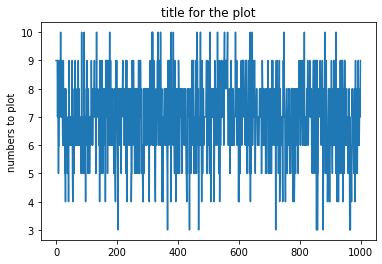

In [2]:
plt.ylabel('numbers to plot')
plt.title('title for the plot')
numbers = np.random.binomial(10, 0.7, 1000)
print(np.mean(numbers))
plt.plot(numbers)
plt.show()

#### We can specify the range on x-axis easily.

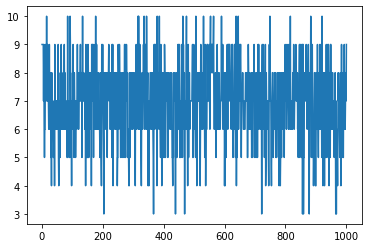

In [3]:
plt.plot(np.arange(1, len(numbers) + 1, 1), numbers)

#### Furthermore, we can truncate the limits either by using the function `plt.axis()` or setting each limit directly.

(1.0, 2.0, 1.0, 4.0)

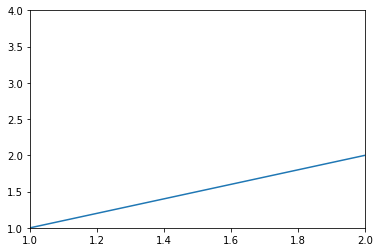

In [4]:
plt.plot([1,2,5,6], [1,2,3,4])
plt.axis([1,2,1,4])

#### Different formatting of plots can be used inside one function call.

C:\Users\maxgr\AppData\Local\Temp\ipykernel_30136\1171157206.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, x, 'b--', x, np.exp(x), 'rs', x, 1./x, 'g^', x, np.sin(x))


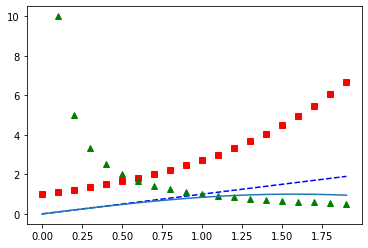

In [5]:
x = np.arange(0, 2, 0.1)
plt.plot(x, x, 'b--', x, np.exp(x), 'rs', x, 1./x, 'g^', x, np.sin(x))

#### When we use data containers such as `pandas.DataFrame` we can plot things with specific labels.

In [6]:
import pandas as pd
data = pd.DataFrame()
size = 100
data['a'] = np.random.random(size)
data.insert(len(data.columns), 'b', np.random.binomial(12, 0.2, size)/12.0)
data.loc[:, 'colors'] = np.random.randint(0, 50, size)
data['sizes'] = np.random.randint(1, 150, size)
data

,a,b,colors,sizes
0,0.229420,0.000000,29,124
1,0.575812,0.083333,26,129
2,0.648603,0.250000,28,76
3,0.529747,0.166667,43,6
4,0.538346,0.083333,36,8
...,...,...,...,...
95,0.167914,0.000000,28,23
96,0.749639,0.166667,8,75
97,0.835590,0.083333,47,4
98,0.916490,0.083333,35,124


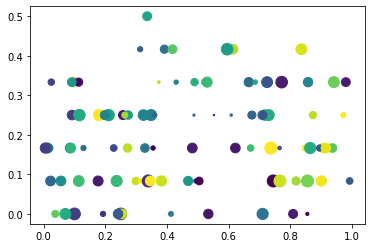

In [27]:
plt.scatter('a', 'b', c='colors', s='sizes', data=data)

#### We can also insert categorical variable into the dataframe and use the categories as labels.

a         11.870608
b         64.573991
colors     0.004360
sizes      0.000592
dtype: float64


Text(0.5, 0.98, 'Categorical Plotting')

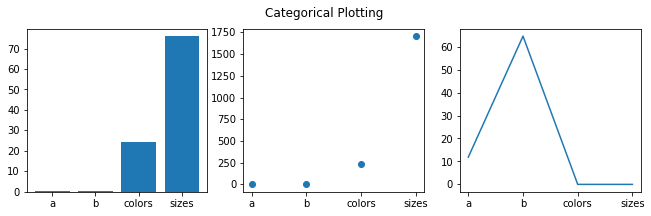

In [46]:

plt.figure(figsize=(11, 3))
plt.subplot(131)
plt.bar(data.columns, data.mean(axis = 0))
plt.subplot(132)
plt.scatter(data.columns, data.var(axis = 0))
plt.subplot(133)
print(data.agg(func = lambda x: np.var((x - np.mean(x))/np.var(x)), axis = 0))
plt.plot(data.columns, data.agg(func = lambda x: np.var((x - np.mean(x))/np.var(x)), axis = 0))
plt.suptitle('Categorical Plotting')

#### There are multiple parameters that are available for plots, those include most common ones:
- alpha -- opacity 
- color/c -- color
- data
- label 
- linestyle/ls
- linewidth/lw
- marker
- markeredgeclor/mec
- xdata
- ydata

and more...

#### To work with multiple figures we can use plt.subplot option.
The subplot call specifies `numrows, numcols, plot_number` where plot_number ranges from 1 to numrows*numcols. `The commas in the subplot call are optional if numrows*numcols<10`. So subplot(211) is identical to subplot(2, 1, 1).

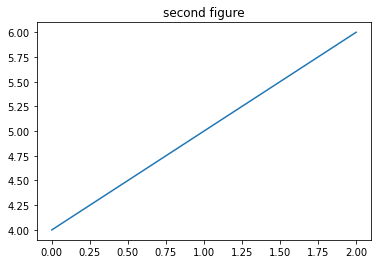

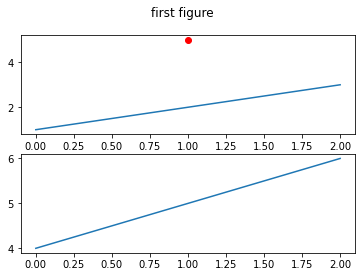

In [52]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])
plt.suptitle('first figure')


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot() by default
plt.title('second figure')


plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.scatter(1,5, c='red')

#### To add labels we simply specify the axis where we want to put it onto

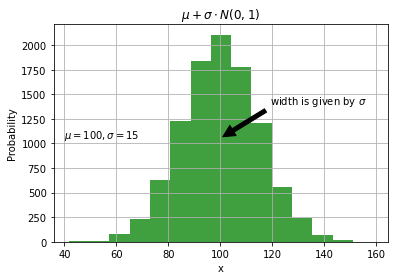

In [84]:
from locale import normalize

num = 10000
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(num)

# the histogram of the data
n, bins, patches = plt.hist(x, 15, density=False, facecolor='g', alpha=0.75)


plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram')
plt.text(np.max(x)/4, np.max(n)/2, r'$\mu =100, \sigma =15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

# mathematical expressions
plt.title(r'$\mu + \sigma \cdot N(0,1) $')

# text annotations
plt.annotate('width is given by $\sigma $',xy=(mu, np.max(n)/2), xytext=(3/4*np.max(x), 2/3*np.max(n)), arrowprops=dict(facecolor='black', shrink=0.05))


plt.show()

#### To use logscale simply type the scale in `plt.yscale` function.


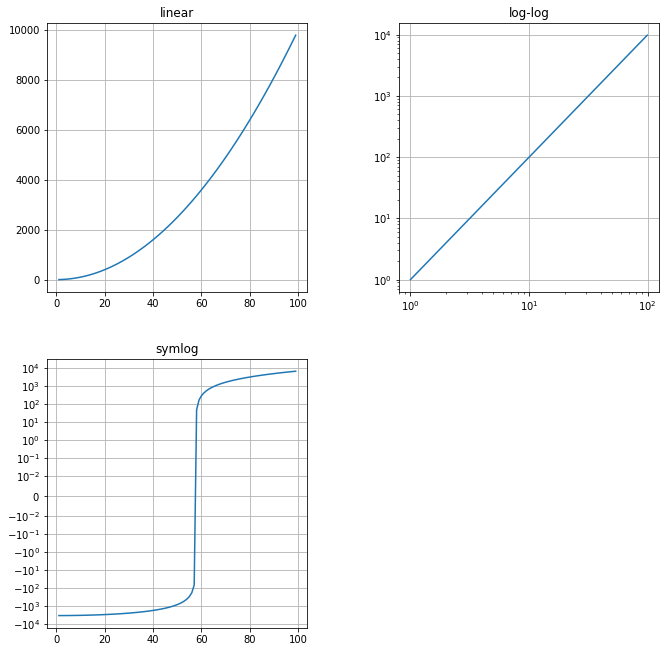

In [88]:
# plot with various axes scales
plt.figure(figsize=(10,10))

x = np.arange(1, 100)
y = np.power(x, 2)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.xscale('log')
plt.title('log-log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

## Images manipulation
Matplotlib relies on the Pillow library to load image data.

In [7]:
%matplotlib inline
import matplotlib.image as mpimg

In [8]:
img = mpimg.imread('./Richard-Feynman.jpg')
img

array([[[ 67,  67,  67],
        [ 70,  70,  70],
        [ 74,  74,  74],
        ...,
        [135, 135, 135],
        [140, 140, 140],
        [129, 129, 129]],

       [[ 67,  67,  67],
        [ 69,  69,  69],
        [ 72,  72,  72],
        ...,
        [131, 131, 131],
        [134, 134, 134],
        [125, 125, 125]],

       [[ 66,  66,  66],
        [ 67,  67,  67],
        [ 68,  68,  68],
        ...,
        [128, 128, 128],
        [129, 129, 129],
        [123, 123, 123]],

       ...,

       [[222, 222, 222],
        [223, 223, 223],
        [223, 223, 223],
        ...,
        [202, 202, 202],
        [198, 198, 198],
        [196, 196, 196]],

       [[216, 216, 216],
        [219, 219, 219],
        [220, 220, 220],
        ...,
        [203, 203, 203],
        [202, 202, 202],
        [201, 201, 201]],

       [[220, 220, 220],
        [221, 221, 221],
        [221, 221, 221],
        ...,
        [204, 204, 204],
        [205, 205, 205],
        [205, 205, 205]]

We shall nottice that the dtype is uint8. Matplotlib can also work with channel arrays of floats32, but Pillow cannot. Each inner list represents a pixel. Here, with an RGB image, there are 3 values. Since it's a black and white image, R, G, and B are all similar. An RGBA (where A is alpha, or transparency), has 4 values per inner list, and a simple luminance image just has one value (and is thus only a 2-D array, not a 3-D array). For grayscale, Matplotlib `supports only float32`. 

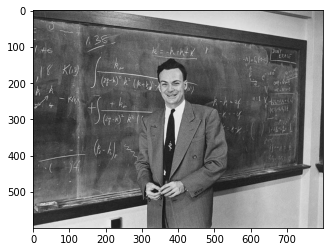

In [9]:
plt.imshow(img)

#### Single channel plots

array([[ 67,  70,  74, ..., 135, 140, 129],
       [ 67,  69,  72, ..., 131, 134, 125],
       [ 66,  67,  68, ..., 128, 129, 123],
       ...,
       [222, 223, 223, ..., 202, 198, 196],
       [216, 219, 220, ..., 203, 202, 201],
       [220, 221, 221, ..., 204, 205, 205]], dtype=uint8)

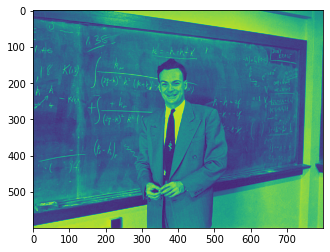

In [95]:
plt.imshow(img[:,:,0]) 
img[:,:,0]

You can also change colormaps on existing plot objects using the set_cmap() method:

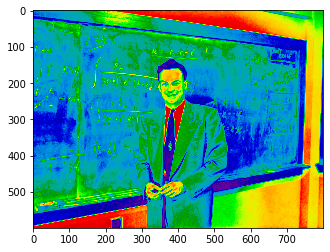

In [97]:
imgplot = plt.imshow(img[:,:,0])
imgplot.set_cmap('nipy_spectral')

#### To add a colorbar we use .colorbar function.

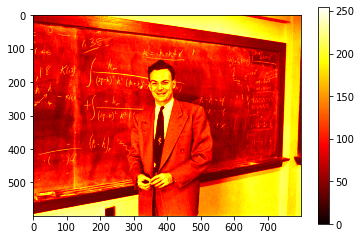

In [99]:
imgplot = plt.imshow(img[:,:,0])
imgplot.set_cmap('hot')
plt.colorbar()

#### It is sometimes usefull in ML to examine a range of pixels in the plot with a histogram.

(array([4.18311111e-06, 1.04577778e-05, 4.18311111e-06, 1.25493333e-05,
        1.25493333e-05, 2.71902222e-05, 2.71902222e-05, 2.50986667e-05,
        2.30071111e-05, 5.22888889e-05, 5.01973334e-05, 6.48382223e-05,
        8.15706667e-05, 1.04577778e-04, 1.17127111e-04, 1.44317333e-04,
        1.52683556e-04, 2.21704889e-04, 2.55169778e-04, 2.92817778e-04,
        3.34648889e-04, 4.43409778e-04, 4.99881778e-04, 5.43804445e-04,
        7.34136000e-04, 9.01460445e-04, 1.03322845e-03, 1.23610933e-03,
        1.51010311e-03, 2.47221867e-03, 2.11874578e-03, 2.57261333e-03,
        2.64581778e-03, 3.34021422e-03, 3.08713600e-03, 3.20426311e-03,
        3.39668622e-03, 3.68950400e-03, 3.48244000e-03, 3.89865956e-03,
        3.81081422e-03, 4.02833600e-03, 4.18938578e-03, 4.47592889e-03,
        4.97162756e-03, 5.14940978e-03, 5.59909423e-03, 6.24538489e-03,
        6.37924445e-03, 6.59049156e-03, 6.58421689e-03, 6.63859734e-03,
        6.73899200e-03, 6.54447734e-03, 6.59467467e-03, 6.782914

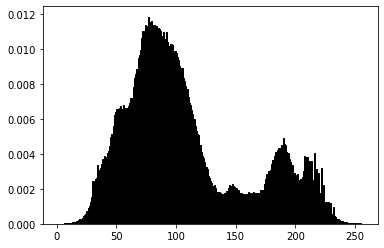

In [101]:
plt.hist(img.ravel(), bins=256, range=(1, 256), fc='k', ec='k', density=True)

Most often, the "interesting" part of the image is around the peak, and you can get extra contrast by clipping the regions above and/or below the peak. In our histogram, it looks like there's most useful information in the 50 region. We can visualise it with plot.

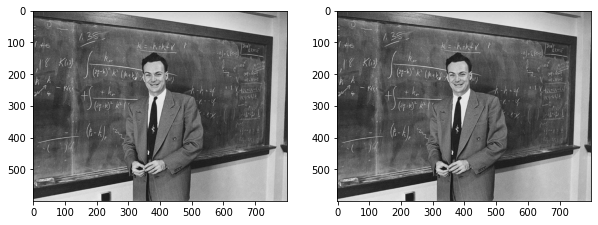

In [10]:
plt.figure(1, figsize=(10,10))
plt.subplot(121)
imgplot = plt.imshow(img, clim=(50, 110))
plt.subplot(122)
imgplot = plt.imshow(img)

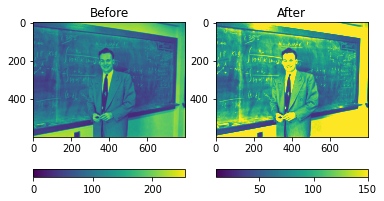

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img[:,:,0])
ax.set_title('Before')
plt.colorbar(orientation='horizontal')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img[:,:,0])
imgplot.set_clim(10,150)
ax.set_title('After')
plt.colorbar(orientation='horizontal')

#### Interpolation

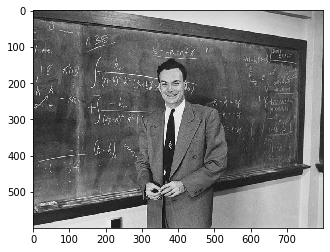

In [12]:
plt.imshow(img, interpolation="nearest")


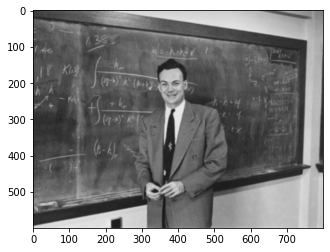

In [13]:
plt.imshow(img, interpolation="bicubic")

## Subplots and artists

In [14]:
%matplotlib inline

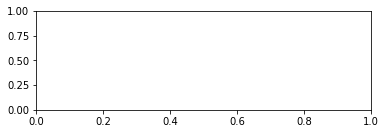

In [15]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1) # two rows, one column, first plot

Axes class is one of the most usefull classes in the whole library. With Subplot we can exploit it even further. 

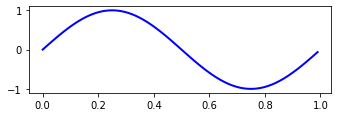

In [16]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.15, 0.1, 0.7, 0.3])
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax2.plot(t, s, color='blue', lw=2)

### Example

In [17]:
Lx = 5
Ly = 5
Ns = Lx * Ly
d = 2
bc = 1

Jdd = -1.0
cos_theta_af = None
cos_theta_f = None

if d == 1:
    cos_theta_af = np.array([1 if i % 2 == 0 else -1 for i in range(Lx)])
    cos_theta_f = np.ones(Lx)
else:
    cos_theta_af = []
    if Lx % 2 == 0:
        for j in range(Ly):
            for i in range(Lx):
                n = j * Lx + i
                cos_theta_af.append((1 if i % 2 == 0 else -1) if j % 2 == 0 else (-1 if i % 2 == 0 else 1))
        cos_theta_af = np.array(cos_theta_af)
    else:            
        cos_theta_af = np.array([1 if i%2==0 else -1 for i in range(Ns)])
    cos_theta_f = np.ones(Ns)

print(cos_theta_af)

en_ferro = Jdd * np.sum(cos_theta_f[0:-1] * cos_theta_f[1:])
en_aferro = Jdd * np.sum(cos_theta_af[0:-1] * cos_theta_af[1:])

en_ferro, en_aferro

[ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1
  1]


(-24.0, 24.0)

In [21]:
df = pd.read_csv(f"type=square,_BC={bc},dim={d},Ns={Lx*Ly},Lx={Lx},Ly={Ly},Lz=1.dat", sep = '\t', names = ['J1','J2','E_ferro', 'E_aferro','E_ed','E_aed', 'idx']).dropna(axis = 1)
df['E_aferro'] -= en_aferro
df['E_ferro'] -= en_ferro
df['difference'] = df['E_aferro'] - df['E_ferro']
df[['E_ferro','E_aferro','E_ed','E_aed','difference']] /= Ns
print(df.dtypes)
df

J1            float64
J2            float64
E_ferro       float64
E_aferro      float64
E_ed          float64
E_aed         float64
difference    float64
dtype: object


,J1,J2,E_ferro,E_aferro,E_ed,E_aed,difference
0,-1.7,-2.0,-4.327856,-1.227513,0.0,0.0,3.100343
1,-1.7,-1.9,-4.547063,-1.081920,0.0,0.0,3.465143
2,-1.7,-1.8,-4.414630,-1.216002,0.0,0.0,3.198628
3,-1.7,-1.7,-3.301320,-0.624831,0.0,0.0,2.676489
4,-1.7,-1.6,-3.747091,-1.592991,0.0,0.0,2.154099
...,...,...,...,...,...,...,...
1717,-0.6,1.6,-2.173728,-0.222168,0.0,0.0,1.951560
1718,-0.6,1.7,-2.631209,-0.288801,0.0,0.0,2.342408
1719,-0.6,1.8,-2.224800,-0.269649,0.0,0.0,1.955151
1720,-0.6,1.9,-2.124811,-0.175333,0.0,0.0,1.949478


In [22]:
import seaborn as sns
df_pivoted = df.pivot(columns='J1', index='J2', values='difference')
df_pivoted

J1,-2.0,-1.9,-1.8,-1.7,-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,...,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1
J2,,,,,,,,,,,,,,,,,,,,,
-2.0,3.559575,2.810384,3.235856,3.100343,2.795284,0.131503,1.650637,2.870576,2.365456,3.064703,...,-0.152590,-1.185512,0.312527,-0.644841,-1.132030,-0.310037,0.018701,-1.832347,-1.396550,-0.051004
-1.9,3.491947,2.521270,4.226280,3.465143,3.026319,2.929713,2.847973,2.342849,2.950862,2.270368,...,-0.855781,-0.869677,-1.296189,-0.728930,-0.820725,-1.559819,-0.967664,-1.210678,-1.355982,-1.013993
-1.8,2.299690,2.248418,2.354821,3.198628,3.520574,2.495207,2.269705,1.464598,2.261518,2.997747,...,-0.949680,-1.250467,-0.617512,-0.603971,-0.614158,-0.096231,-0.840189,-0.510564,-0.121544,-0.605014
-1.7,2.513955,2.723690,1.967278,2.676489,2.789215,3.204644,2.719422,3.093589,3.202091,2.808487,...,-0.347752,-0.589531,-0.556710,-0.615055,-0.598222,-1.307609,-0.913488,-0.534565,-0.665315,0.911612
-1.6,3.090984,2.352293,2.804838,2.154099,3.173683,2.750941,3.101590,1.659424,2.689276,1.652489,...,-0.521140,-0.441643,-0.645727,-0.911847,-1.317877,-0.880802,-0.487778,0.458398,-0.836030,-0.773725
-1.5,2.918504,3.036923,1.962250,3.635448,2.563675,2.727058,3.178623,2.612458,1.680661,2.960731,...,-1.226445,-0.236242,-0.350502,0.642765,-0.758479,-1.339035,-0.375590,-0.971563,-1.655507,-0.326914
-1.4,1.483468,1.774008,2.333374,3.161221,2.702730,2.962950,3.318551,2.672667,2.690768,2.938458,...,-1.063690,-0.198004,-0.204601,-0.232809,-0.207270,0.509205,-0.210572,0.286957,-0.631234,-0.590269
-1.3,1.591681,1.887025,2.583349,2.011108,1.985366,1.421812,3.012184,-0.227484,2.089240,2.096604,...,0.414623,-0.173875,-0.752004,-0.086896,-0.456375,-0.651437,-0.101625,-1.562329,-0.095638,-1.140663
-1.2,2.851879,1.901372,2.684658,1.612419,1.347492,2.018797,1.776205,1.008701,1.282170,1.913854,...,-0.101946,-0.423689,-0.290903,-0.021439,0.019424,-0.786458,-0.005871,1.516492,0.029126,-0.022762


41 42 41
(41, 42)
4.693860988660276 -1.8323469575439362


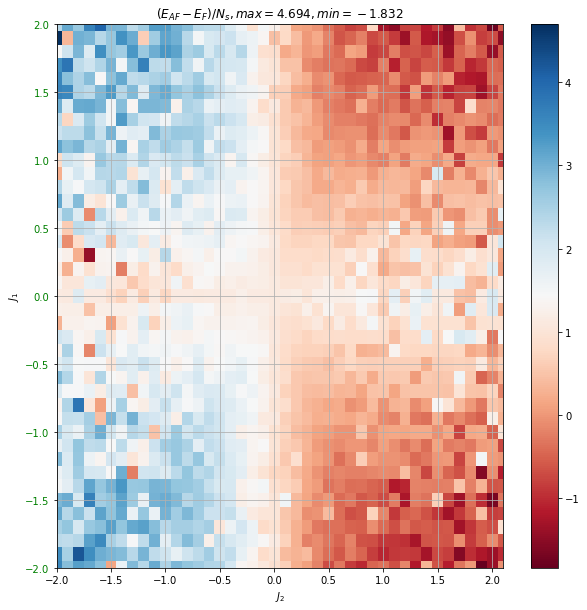

In [23]:
x, y = np.array(df_pivoted.index), np.array(df_pivoted.columns)
z = np.array(df_pivoted)
print(len(x), len(y),len(z))
print(z.shape)

iterator = 0

#z=z.reshape(len(x), len(y))
z_min, z_max = np.min(z), np.max(z)
print(z_max, z_min)
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_xlim(np.min(y), np.max(y))
ax.set_ylim(np.min(x), np.max(x))
ax.set_xlabel('$J_2$')
ax.set_ylabel('$J_1$')
ax.set_title('$(E_{AF} - E_{F})/N_s$'+f'$,max={z_max:.3f},min={z_min:.3f}$')
ax.tick_params(labelrotation=0)
c = ax.pcolormesh(y, x, z, cmap='RdBu')#, vmin=z_min, vmax=abs(z_min))
ax.set_ylim([np.min(x),np.max(x)])
ax.set_xlim([np.min(y),np.max(y)])
for ax in fig.axes:
    ax.grid(True)
    
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)
    
fig.colorbar(c, ax=ax)
plt.show()

#### Legend

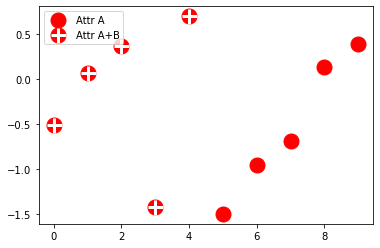

In [24]:

z = np.random.randn(10)

fig, ax = plt.subplots()
red_dot, = ax.plot(z, "ro", markersize=15)
# Put a white cross over some of the data.
white_cross, = ax.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

ax.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])